# Day 33: Introduction to AdaBoost

AdaBoost, short for Adaptive Boosting, is a compelling technique in the field of machine learning that focuses on converting a collection of weak learning models into a strong predictive force. This introduction provides an essential foundation for understanding AdaBoost, unpacking its core mechanisms, mathematical formulations, and practical significance in enhancing machine learning model accuracies. We delve into its unique approach of leveraging "weak learners," the strategic weight update mechanism, and the integration of learners for final decision making. Through this exploration, learners will grasp not only the theoretical underpinnings of AdaBoost but also its application in solving complex classification problems.

## Definition
AdaBoost is a boosting algorithm that combines multiple weak classifiers into a single strong classifier. Here, a weak classifier refers to a model that performs slightly better than random guessing. The strength of AdaBoost lies in its iterative approach to focusing on incorrectly classified instances by adjusting their weights. This process ensures that subsequent learners give more attention to challenging cases. The elementary formula for updating the weights of the instances is given as follows:

- Weight update formula: $w_i \leftarrow w_i \times \exp(\alpha_t \times I(y_i \ne f_t(x_i)))$

where $w_i$ is the weight of the $i^{th}$ instance, $\alpha_t$ is the weight of the $t^{th}$ classifier, dependent on its error rate, $I$ is an indicator function that returns $1$ if the condition inside is true (the instance is misclassified) and $0$ otherwise, $y_i$ is the actual label, and $f_t(x_i)$ is the prediction of the $t^{th}$ weak classifier.

- Final output calculation involves summing up the weighted predictions of all the weak learners to make the final decision.

## Importance
Understanding and implementing AdaBoost is crucial for several reasons. Firstly, it showcases the power of ensemble learning, where multiple learning algorithms are combined to improve predictive performance. AdaBoost's ability to focus on difficult instances makes it exceptionally skilled at enhancing weak models that perform just above chance. Its applications span various domains from image and speech recognition to biological classifications, demonstrating its versatility and effectiveness across different fields.

## Applications and Examples
- **Image Recognition**: AdaBoost can improve the accuracy of detection algorithms, identifying faces or objects within images with higher precision by focusing on hard-to-classify instances.
- **Customer Churn Prediction**: Businesses use AdaBoost to predict which customers are likely to leave their service for competitors. By accurately identifying these customers, companies can implement targeted retention strategies.
- **Fraud Detection in Banking**: AdaBoost helps in enhancing the performance of models designed to detect fraudulent transactions, adapting to the ever-evolving tactics of fraudsters by emphasizing transactions that are harder to classify.

In the following sections, we will delve deeper into each of these aspects, understanding the critical role of weak learners, the intricacies of the weight update rule, and the calculation for the final model output. This foundational knowledge will pave the way for both theoretical understanding and practical implementation exercises, including developing an AdaBoost classifier from scratch in Python.


# Understanding Weak Learners in AdaBoost

A weak learner in the framework of AdaBoost is any classifier that can generate predictions with an accuracy slightly better than chance. This means that for a binary classification problem, a weak learner would have an accuracy just above 50%. The power of AdaBoost is its ability to take these simple models and, through a strategic process of iteration and weight adjustments, amplify their strengths to achieve superior classification performance.

## Role in AdaBoost
Weak learners are the foundation upon which AdaBoost builds a strong classifier. The algorithm begins with a data set and assigns equal weights to all observations. It then iteratively:
1. Applies a weak learner to the weighted data.
2. Increases the weights of misclassified observations, thereby making them a priority for the next classifier.
3. Adds the trained learner to the ensemble of classifiers, with its say in the final classification proportional to its accuracy.

This process ensures that each successive learner focuses more on the examples that previous learners found challenging, gradually creating a robust classification model.

## Selection and Enhancement of Weak Learners
The key to the success of AdaBoost lies in the deliberate selection and enhancement of weak learners throughout its iterative process. At each iteration, the algorithm selects a new weak learner with a preference for those that perform well on the instances that the current ensemble finds difficult. This is achieved by adjusting the instance weights: instances misclassified by the current ensemble receive increased weights, while correctly classified instances have their weights decreased.

The ability of AdaBoost to enhance its weak learners is quantified by the error rate of each learner on the weighted dataset. Lower error rates result in higher weights being assigned to the learner's vote in the final ensemble. Conversely, learners with error rates close to or above 0.5 contributing less to the final model, emphasizing AdaBoost's adaptivity in focusing on the most effective classifiers for the given problem.

## Interpretation and Understanding
The core philosophy behind AdaBoost's use of weak learners is that a combination of simple, focused corrections can cumulatively solve a complex problem more effectively than a single, highly complex model. This approach not only improves prediction accuracy but also offers insights into which aspects of the data are challenging to classify, guiding further investigation and model improvement.

By understanding the role and optimization of weak learners within AdaBoost, practitioners can more effectively apply this algorithm in various fields, from natural language processing to customer behavior prediction, harnessing the power of ensemble learning to achieve exceptional model performance.

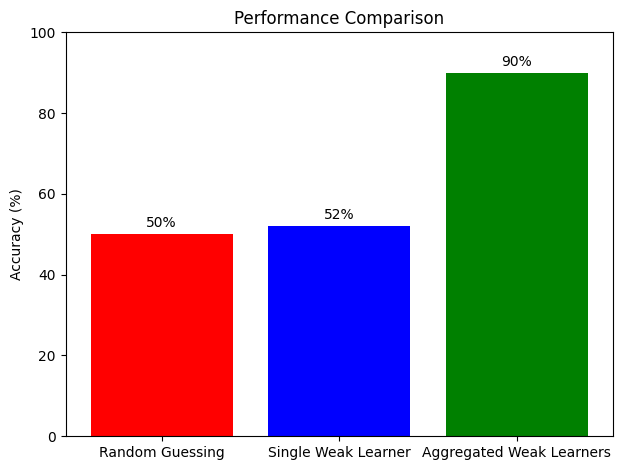

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Random Guessing', 'Single Weak Learner', 'Aggregated Weak Learners']
performance = [50, 52, 90]  # Assuming a slight improvement with a single weak learner and a significant improvement when aggregating

# Creating the bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, performance, color=['red', 'blue', 'green'])

# Adding specific details to make the chart more informative
ax.set_ylabel('Accuracy (%)')
ax.set_title('Performance Comparison')
ax.set_ylim(0, 100)  # Adjusting y-axis to show percentages clearly

# Adding the percentage values on top of each bar for clarity
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Interpretation:
# This visualization clearly demonstrates the effectiveness of AdaBoost's approach. By starting with random guessing 
# (accuracy at 50%), incrementally improving with a single weak learner (slightly better than random guessing), and 
# significantly enhancing performance through the aggregation of multiple weak learners, we see how ensemble methods like 
# AdaBoost transform weak learners into a powerful composite classifier.



# The Weight Update Rule in AdaBoost

At the heart of the AdaBoost algorithm is a simple yet powerful strategy for iteratively refining the model's focus on those instances that previous learners have misclassified. This section delves into the weight update rule, a critical mechanism enabling AdaBoost to adjust its learning focus dynamically, thereby enhancing its overall predictive capability.

## Definition
AdaBoost updates the weights of the training instances through an exponential formula, which is designed to increase the weights of wrongly classified instances and decrease the weights or maintain the weights of correctly classified instances. This makes sure that subsequent classifiers pay more attention to the harder cases.

**Weight Update Rule**: 

$$ w_i \leftarrow w_i \times \exp(\alpha_t \times I(y_i \ne f_t(x_i))) $$

Where:

- $w_i$: Weight of the $i^{th}$ instance before the update.
- $\exp$: Exponential function, ensuring that weight adjustments are non-linear.
- $\alpha_t$: The performance weight of the $t^{th}$ classifier, calculated as $\alpha_t = 0.5 \cdot \log(\frac{1 - err_t}{err_t})$, with $err_t$ being the error rate of the classifier.
- $I(\cdot)$: Indicator function, returning $1$ if the condition ($y_i \ne f_t(x_i)$) is true (misclassification) and $0$ otherwise.
- $y_i$: Actual label of the $i^{th}$ instance.
- $f_t(x_i)$: Prediction of the $t^{th}$ classifier on the $i^{th}$ instance.

It is important to note that $\alpha_t$ is directly tied to the performance of the classifier, meaning that better-performing classifiers will have a greater influence on the weight update process. This dynamic allows AdaBoost to allocate more "say" in the learning process to those classifiers that have proved to be more accurate.

## Applications and Importance
The weight update mechanism is foundational in AdaBoost's success across various applications:

- **Enhancing Model Sensitivity**: By progressively focusing more on hard-to-classify instances, AdaBoost becomes increasingly sensitive to subtle patterns that might be missed by a single model or weaker learners.
- **Versatile Applicability**: This dynamic tuning process, embodied by the weight update rule, is central to AdaBoost's effectiveness in areas such as image recognition, customer churn prediction, and fraud detection.
- **Error Correction**: The iterative weight adjustment facilitates error correction in sequential models, allowing previous misclassifications to guide future learning in a productive manner.

Understanding the weight update rule is pivotal in leveraging AdaBoost's full potential and appreciating its strategic approach to ensemble learning, where it systematically capitalizes on the collective strengths of multiple learners.

### Adaboost with `sklearn`

We'll utilize `sklearn` for creating a basic model setup and `numpy` for managing instance weights and calculations related to the weight update rule.


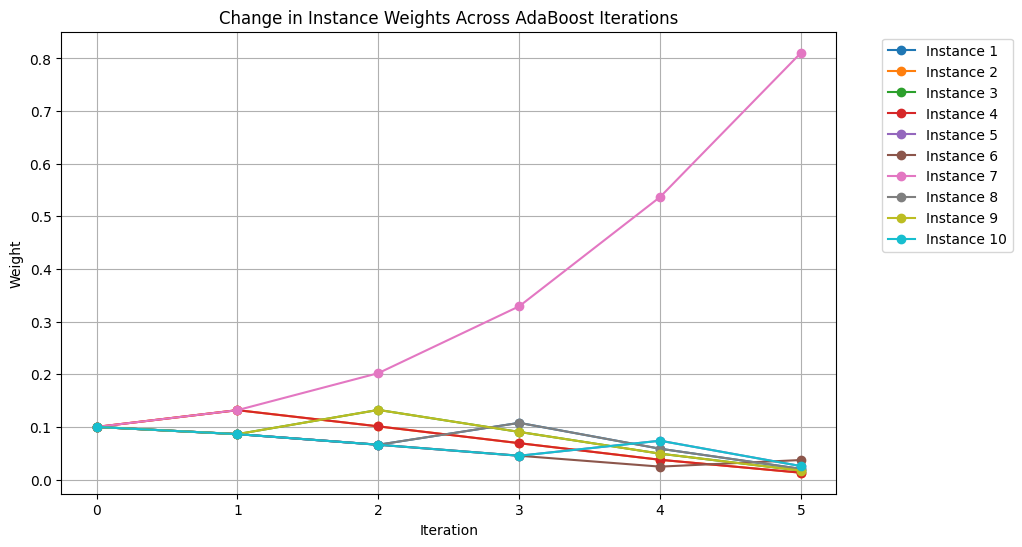

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating data: 10 instances with initial equal weights
num_instances = 10
iterations = 5  # Simulating 5 iterations of AdaBoost
weights = np.ones((iterations + 1, num_instances)) / num_instances

# Simulated error rates and classifier performances (alpha_t) for 5 iterations
error_rates = np.array([0.3, 0.2, 0.15, 0.1, 0.05])
alpha_t_values = 0.5 * np.log((1 - error_rates) / error_rates)

# Simulated misclassifications for five iterations
misclassified = np.zeros_like(weights, dtype=bool)
misclassified[1, [1, 3, 6]] = True  # Misclassified instances in 1st iteration
misclassified[2, [2, 6, 8]] = True  # Misclassified instances in 2nd iteration
misclassified[3, [0, 6, 7]] = True  # Misclassified instances in 3rd iteration
misclassified[4, [4, 6, 9]] = True  # Misclassified instances in 4th iteration
misclassified[5, [5, 6]] = True     # Misclassified instances in 5th iteration

# Updating weights based on misclassifications and alpha_t values
for t in range(1, iterations + 1):
    weights[t] = weights[t-1] * np.exp(alpha_t_values[t-1] * misclassified[t])
    weights[t] /= weights[t].sum()  # Normalizing weights

# Visualizing how weights change over iterations
plt.figure(figsize=(10, 6))
for i in range(num_instances):
    plt.plot(range(iterations + 1), weights[:, i], '-o', label=f'Instance {i+1}')

plt.title('Change in Instance Weights Across AdaBoost Iterations')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Interpretation:
# This visualization shows how the weights of individual training instances change over several iterations of AdaBoost.
# Instances that are consistently misclassified (e.g., Instance 7) receive progressively higher weights, emphasizing AdaBoost’s
# focus on hard-to-classify cases. This illustrates the adaptive nature of the weight update rule in enhancing model sensitivity.



# Calculating the Final Output in AdaBoost

After understanding the fundamentals of AdaBoost, it's crucial to explore how it integrates the plethora of weak learners 'votes' to formulate a robust prediction. This segment unpacks the process and mathematics behind calculating the final output in AdaBoost, highlighting the ingenious approach of employing the weighted contributions of each learner.

## Definition
The culmination of the AdaBoost algorithm is the calculation of the final output, which is the weighted sum of the predictions made by all the weak classifiers. The idea is to give higher weight to the predictions of classifiers that have lower error rates and, consequently, are deemed more accurate. The final prediction is then made based on the sign of the sum of these weighted predictions. Mathematically, this can be represented as:

- Final output formula: $f(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t \cdot f_t(x)\right)$

Here, $\alpha_t$ represents the weight of the $t^{th}$ classifier (indicative of its accuracy), and $f_t(x)$ is the prediction made by the $t^{th}$ classifier for a data point $x$. $T$ is the total number of classifiers. The function $\text{sign}$ returns $1$ if the argument is positive and $-1$ otherwise, representing the final classification outcome based on the combined weighted predictions.

The final output calculation in AdaBoost is a pivotal step that showcases the strength of collective intelligence. By attributing more significance to the more accurate classifiers, AdaBoost ensures that the ensemble's final decision is more reliable than any individual weak learner's prediction.


## Exercise For The Reader

In this exercise, you will have the opportunity to implement the AdaBoost algorithm from scratch using Python. You will work with a simple dataset to solve a binary classification problem, applying the core concepts and mechanisms of AdaBoost as introduced in the lesson. Your task involves four main steps:

1. **Initialize the weights** for the training instances.
2. **Select and train weak learners**, typically using decision stumps (a one-level decision tree) for this purpose.
3. **Update the weights** of the instances based on the performance of the weak learners, focusing more on the instances that were incorrectly classified.
4. **Combine the weak learners** into a final model using a weighted vote, where the vote of each weak learner is weighted by its accuracy.

### Definition
Recall from the lesson that AdaBoost iteratively adjusts the weights of incorrectly classified instances so that successive weak learners focus more on the difficult cases. The weight update formula and the process for combining weak learners you'll need are as follows:

1. **Weight Update**: For each instance $i$, update its weight $w_i$ using the formula $w_i \leftarrow w_i \times \exp(\alpha_t \times I(y_i \ne f_t(x_i)))$, where:
   - $\alpha_t$ is the weight of the $t^{th}$ classifier (weak learner), which is calculated based on its error rate.
   - $I$ is an indicator function that returns $1$ if the instance is misclassified ($y_i \ne f_t(x_i)$) and $0$ otherwise.
   - $y_i$ is the actual label of the $i^{th}$ instance.
   - $f_t(x_i)$ is the prediction by the $t^{th}$ weak learner for the $i^{th}$ instance.

2. **Final Output Calculation**: The ultimate prediction is made by summing the weighted predictions of all the weak learners and taking the sign of this sum as the final classification decision.

### Task
Your task is to use Python to implement these concepts. Begin with a dataset of your choice (for simplicity, the Iris dataset or any binary classification dataset can be used). Follow these steps:

1. **Initialize** each instance's weight to $1/N$ where $N$ is the total number of instances in the dataset.
2. **Iteratively**:
   - Train a weak learner using the current weights of the instances.
   - Calculate the error rate of the weak learner.
   - Compute the weight ($\alpha$) of the weak learner using its error rate.
   - Update the weights of the instances using the provided formula.
3. **Combine the weak learners** based on their calculated weights ($\alpha$ values) to make the final prediction.



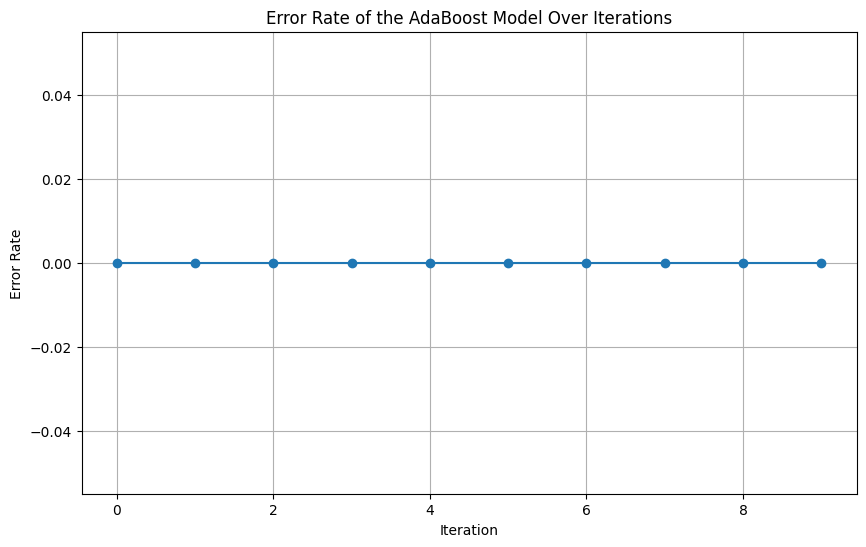

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[.5], flip_y=0, random_state=1)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for our AdaBoost implementation

# Initialize weights for all instances
N = X.shape[0]  # Number of instances
weights = np.ones(N) / N  # Initial weight for each instance

# Placeholder for the AdaBoost steps
T = 10  # Number of iterations
error_rates = []  # To track the error rate of the model at each iteration

# Initialize variables to store the final model
alphas = []  # Store the alpha values of the weak learners
learners = []  # Store the weak learners


for t in range(T):
    # Step 1: Train a weak learner.
    # Use a decision stump (depth=1) as the weak learner
    weak_learner = DecisionTreeClassifier(max_depth=1, random_state=1)
    weak_learner.fit(X, y, sample_weight=weights)
    
    # Step 2: Make predictions and calculate the error rate of the weak learner.
    predictions = weak_learner.predict(X)
    miss = predictions != y  # Boolean array indicating whether each prediction is incorrect
    error_rate = np.dot(weights, miss) / weights.sum()  # Weighted error rate
    
    # Store the error rate
    error_rates.append(error_rate)
    
    # Step 3: Calculate the weak learner's weight (alpha) using its error rate
    alpha = 0.5 * np.log((1 - error_rate) / max(error_rate, 1e-10))
    
    # Step 4: Update instance weights
    # Weights are increased for misclassified instances and decreased for correctly classified instances
    weights *= np.exp(alpha * miss * ((weights > 0) | (alpha < 0)))
    
    # Normally, you would also update the predictions of the ensemble model here and check for termination conditions.
    # For simplicity, we're focusing on the weight update mechanism and the model's error rate over iterations.

# Visualization of error rate over iterations
plt.figure(figsize=(10, 6))
plt.plot(error_rates, marker='o')
plt.title("Error Rate of the AdaBoost Model Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()

# Interpretation:
# This plot shows how the error rate of the AdaBoost model changes over iterations.
# Ideally, the error rate should decrease as the algorithm iterates, indicating that the model is improving.



Final model accuracy: 0.51


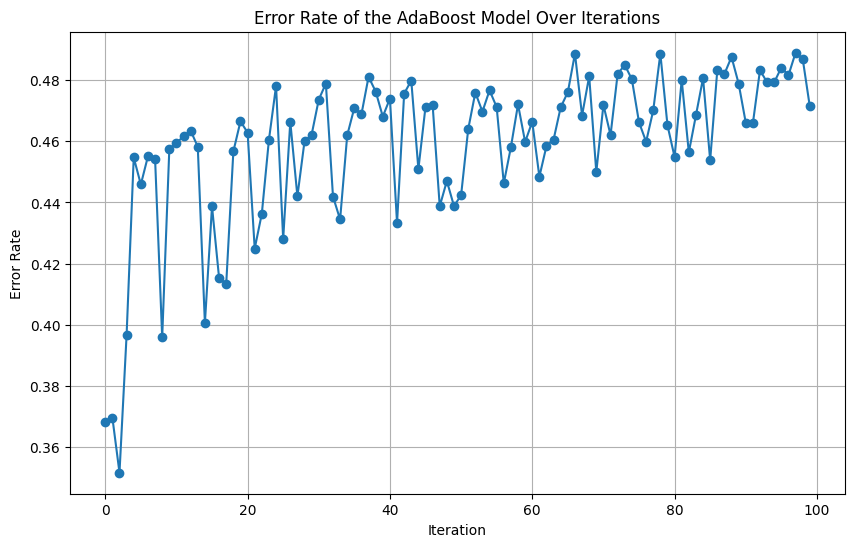

In [40]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate a complex and noisy binary classification dataset
X, y = make_classification(n_samples=2000,  # Increased number of samples
                           n_features=20,  # Increased number of total features
                           n_informative=18,  # Number of informative features
                           n_redundant=2,  # Increased number of redundant features to add noise
                           n_clusters_per_class=2,  # More clusters per class
                           weights=[.5, .5],  # Balanced classes
                           flip_y=0.05,  # 5% label noise
                           class_sep=0.75,  # Decreased class separation
                           random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for our AdaBoost implementation

# Initialize weights for all instances
N = X_train.shape[0]  # Number of instances
weights = np.ones(N) / N  # Initial weight for each instance

# Placeholder for the AdaBoost steps
T = 100  # Number of iterations
error_rates = []  # To track the error rate of the model at each iteration

# Initialize variables to store the final model
alphas = []  # Store the alpha values of the weak learners
learners = []  # Store the weak learners

# To make a final prediction, we need to combine the weak learners based on their alphas
def adaBoostPredict(X):
    #
    # TODO: calculate a prediction (-1 or +1) based on the values in alphas and learners.
    #
    final_prediction = [1 for row in X]
    # Return the sign of the prediction as the final class label
    return np.sign(final_prediction)

for t in range(T):
    # Step 1: Train a weak learner.
    # Use a decision stump (depth=1) as the weak learner
    weak_learner = DecisionTreeClassifier(max_depth=1, random_state=1)
    weak_learner.fit(X_train, y_train, sample_weight=weights)
    
    # Step 2: Make predictions and calculate the error rate of the weak learner.
    predictions = weak_learner.predict(X_train)
    miss = predictions != y_train  # Boolean array indicating whether each prediction is incorrect
    error_rate = np.dot(weights, miss) / weights.sum()  # Weighted error rate
    
    # Store the error rate for plotting
    error_rates.append(error_rate)
    
    # Step 3: Calculate the weak learner's weight (alpha) using its error rate
    alpha = 0.5 * np.log((1 - error_rate) / max(error_rate, 1e-10))

    # Save the trained weak learner and its alpha
    learners.append(weak_learner)
    alphas.append(alpha)
    
    # Step 4: Update instance weights
    # Weights are increased for misclassified instances and decreased for correctly classified instances
    weights *= np.exp(alpha * miss * ((weights > 0) | (alpha < 0)))
    
    # Normally, you would also update the predictions of the ensemble model here and check for termination conditions.
    # For simplicity, we're focusing on the weight update mechanism and the model's error rate over iterations.



    # Test the final model on the training data (for demonstration, normally you'd use a separate test set)
    y_pred = adaBoostPredict(X_test)
print(f"Final model accuracy:", accuracy_score(y_test, y_pred))

# Visualization of error rate over iterations
plt.figure(figsize=(10, 6))
plt.plot(error_rates, marker='o')
plt.title("Error Rate of the AdaBoost Model Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()

# Interpretation:
# This plot shows how the error rate of the AdaBoost model changes over iterations.
# Ideally, the error rate should decrease as the algorithm iterates, indicating that the model is improving.



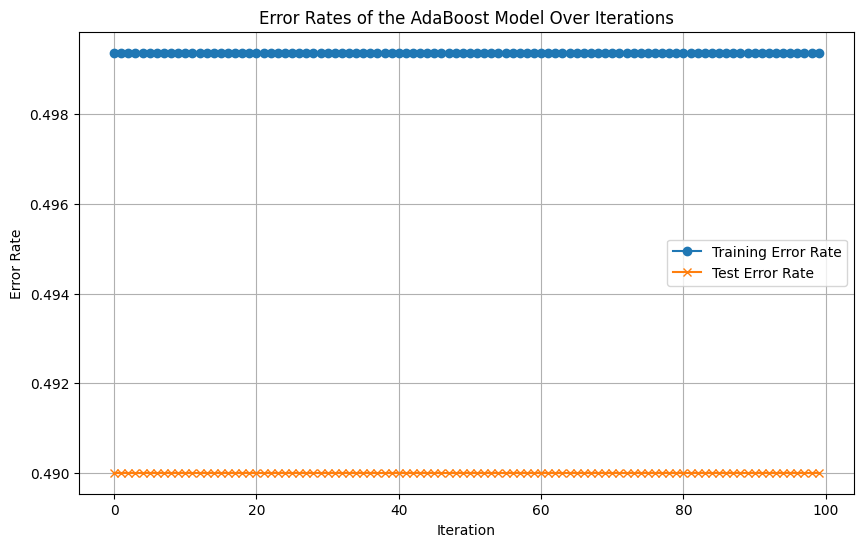

In [41]:
# Additional metrics


# Initialize weights for all training instances
N = X_train.shape[0]  # Number of training instances
weights = np.ones(N) / N  # Initial weight for each instance

# Placeholder for the AdaBoost steps
training_error_rates = []  # To track the training error rate of the model at each iteration
test_error_rates = []  # To track the test error rate of the model at each iteration

all_alphas = alphas
all_learners = learners

for t in range(T):
    # Test on the first t final learners. Set alpha and learners to a subset of the final weak learners.
    alphas = all_alphas[:t]
    learners = all_learners[:t]
    
    # Step 2: Calculate the error rate of the weak learner on both training and test sets.
    train_predictions = adaBoostPredict(X_train)
    test_predictions = adaBoostPredict(X_test)
    
    train_miss = train_predictions != y_train  # Training set misclassifications
    test_miss = test_predictions != y_test  # Test set misclassifications
    
    train_error_rate = np.dot(weights, train_miss) / weights.sum()
    test_error_rate = np.mean(test_miss)  # Simple mean, as test instances are not weighted
    
    # Store the error rates
    training_error_rates.append(train_error_rate)
    test_error_rates.append(test_error_rate)
    
    # Step 3: Calculate the weak learner's weight (alpha) using its error rate
    #alpha = 0.5 * np.log((1 - train_error_rate) / max(train_error_rate, 1e-10))
    
    # Step 4: Update instance weights
    #weights *= np.exp(alpha * train_miss * ((weights > 0) | (alpha < 0)))
    
# Visualization of training and test error rates over iterations
plt.figure(figsize=(10, 6))
plt.plot(training_error_rates, marker='o', label='Training Error Rate')
plt.plot(test_error_rates, marker='x', label='Test Error Rate')
plt.title("Error Rates of the AdaBoost Model Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# hint - adaboost should return alpha * prediction for each learner
# sum(alpha * learner.predict(X) for alpha, learner in zip(alphas, learners))